<a href="https://colab.research.google.com/github/MohsenMaaleki/CIFAR_10_Objects_Classification/blob/main/CIFAR_10_Objects_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim



import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score



np.random.seed(0)
torch.manual_seed(0)

In [ ]:
# Load the CIFAR-10 dataset and perform data augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
#trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=8)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
#testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=8)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
batch_sizes = [32, 64, 128, 256]
loss_values = {batch_size: [] for batch_size in batch_sizes}  # Store the loss values for each batch size


for batch_size in batch_sizes:
    # Create a dataloader with the desired batch size
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=8)

    # Train the model on the CIFAR-10 dataset for 30 epochs
    for epoch in range(20):  # Loop through 10 epochs

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):  # Loop through the data in the training set
            inputs, labels = data  # Get the inputs and labels from the data

            optimizer.zero_grad()  # Zero the gradient buffers

            outputs = model_0(inputs)  # Get the model outputs
            loss = criterion(outputs, labels)  # Calculate the loss
            loss.backward()  # Perform backpropagation
            optimizer.step()  # Update the parameters of the model

            running_loss += loss.item()  # Add up the loss for each iteration

        avg_loss = running_loss / len(trainloader)  # Calculate the average loss for each epoch
        loss_values[batch_size].append(avg_loss)  # Store the average loss value for this epoch and batch size
        print('[Batch size: %d, Epoch %d] loss: %.3f' % (batch_size, epoch + 1, avg_loss))  # Print the average loss for each epoch


[Batch size: 32, Epoch 1] loss: 1.863
[Batch size: 32, Epoch 2] loss: 1.729
[Batch size: 32, Epoch 3] loss: 1.699
[Batch size: 32, Epoch 4] loss: 1.677
[Batch size: 32, Epoch 5] loss: 1.659
[Batch size: 32, Epoch 6] loss: 1.644
[Batch size: 32, Epoch 7] loss: 1.644
[Batch size: 32, Epoch 8] loss: 1.626
[Batch size: 32, Epoch 9] loss: 1.614
[Batch size: 32, Epoch 10] loss: 1.614
[Batch size: 32, Epoch 11] loss: 1.606
[Batch size: 32, Epoch 12] loss: 1.598
[Batch size: 32, Epoch 13] loss: 1.597
[Batch size: 32, Epoch 14] loss: 1.587
[Batch size: 32, Epoch 15] loss: 1.590
[Batch size: 32, Epoch 16] loss: 1.579
[Batch size: 32, Epoch 17] loss: 1.585
[Batch size: 32, Epoch 18] loss: 1.577
[Batch size: 32, Epoch 19] loss: 1.564
[Batch size: 32, Epoch 20] loss: 1.569
[Batch size: 64, Epoch 1] loss: 1.524
[Batch size: 64, Epoch 2] loss: 1.515
[Batch size: 64, Epoch 3] loss: 1.514
[Batch size: 64, Epoch 4] loss: 1.514
[Batch size: 64, Epoch 5] loss: 1.512
[Batch size: 64, Epoch 6] loss: 1.506
[

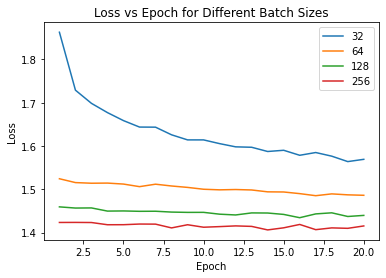

In [ ]:
# Plot the loss values for each batch size and epoch
for batch_size, values in loss_values.items():
    plt.plot(range(1, 21), values, label=str(batch_size))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch for Different Batch Sizes')
plt.legend()
plt.show()




In [ ]:
accuracies = []
for batch_size in batch_sizes:
    # Evaluate the model on the CIFAR-10 test set for a specific batch size
    correct = 0  # Keep track of the number of correctly classified samples
    total = 0  # Keep track of the total number of samples evaluated
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=8)
    with torch.no_grad():  # Don't keep track of gradients during evaluation
        for data in testloader:
            images, labels = data
            outputs = model_0(images)  # Get the model outputs for a batch of test data
            _, predicted = torch.max(outputs.data, 1)  # Get the class with the highest predicted probability
            total += labels.size(0)  # Increment the number of samples evaluated
            correct += (predicted == labels).sum().item()  # Increment the number of correctly classified samples

    accuracy = 100 * correct / total  # Calculate the accuracy
    print('[Batch size: %d] Accuracy of the network on the 10000 test images: %.2f %%' % (batch_size, accuracy))  # Print the accuracy for the current batch size
    accuracies.append(accuracy)


[Batch size: 32] Accuracy of the network on the 10000 test images: 45.87 %
[Batch size: 64] Accuracy of the network on the 10000 test images: 47.19 %
[Batch size: 128] Accuracy of the network on the 10000 test images: 47.76 %
[Batch size: 256] Accuracy of the network on the 10000 test images: 48.52 %


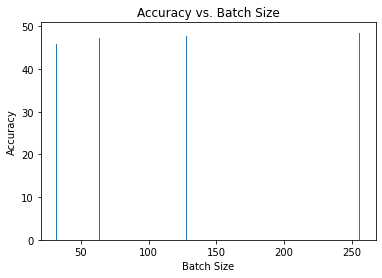

In [ ]:
plt.bar(batch_sizes, accuracies)
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Batch Size')
plt.show()

#Different Hyperparameters : Model 1 
Learning rate: 0.01, Batch size: 64, Optimizer: SGD, Epochs: 10, Activation function: ReLU

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch [1/10], Loss: 1.9224
Epoch [2/10], Loss: 1.7337
Epoch [3/10], Loss: 1.6966
Epoch [4/10], Loss: 1.6791
Epoch [5/10], Loss: 1.6689
Epoch [6/10], Loss: 1.6530
Epoch [7/10], Loss: 1.6390
Epoch [8/10], Loss: 1.6387
Epoch [9/10], Loss: 1.6222
Epoch [10/10], Loss: 1.6227
Finished Training
Accuracy of the network on the test set: 42.29%
F1 score: 0.42


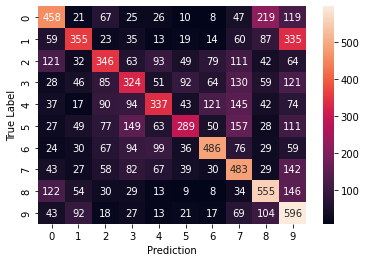

In [ ]:
# Load the pre-trained ResNet18 model
model_1 = torchvision.models.resnet18(pretrained=True)

# Freeze all layers in the feature extractor
for param in model_1.parameters():
    param.requires_grad = False

# Replace the last layer with a fully connected layer for 10 classes
model_1.fc = torch.nn.Sequential(
    torch.nn.Linear(512, 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512, 10)
)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Set the optimizer to SGD with a learning rate of 0.01
optimizer = optim.SGD(model_1.parameters(), lr=0.01)


# Load the CIFAR-10 dataset and perform data augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the training set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Create a DataLoader for the training set
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=8)

# Load the test set
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create a DataLoader for the test set
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=8)




acc1 = []
epochs1 = 0

# Train the model
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model_1(inputs)        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

    print('Epoch [{}/10], Loss: {:.4f}'.format(epoch + 1, running_loss / len(trainloader)))
    epochs1 = epoch + 1



print('Finished Training')


# Evaluate the model on the test set
  
with torch.no_grad():
    correct = 0
    total = 0
    all_predictions = []
    all_targets = []
    for data, target in testloader:
        output = model_1(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        all_predictions.extend(predicted.tolist())
        all_targets.extend(target.tolist())

    accuracy = 100 * correct / total
    print('Accuracy of the network on the test set: {:.2f}%'.format(accuracy))
    acc1.append(accuracy)
    
    # Calculate the confusion matrix
    cm1 = confusion_matrix(all_targets, all_predictions)
    #print('Confusion matrix:')
    #print(cm)
    f1_1 = f1_score(all_targets, all_predictions, average='weighted')
    print('F1 score: {:.2f}'.format(f1_1))


sns.heatmap(cm1, annot=True, fmt="d")
plt.xlabel("Prediction")
plt.ylabel("True Label")
plt.show()

# Different Hyperparameters : Model 2 
Learning rate: 0.1, Batch size: 128, Optimizer: Adam, Epochs: 20, Activation function: Tanh

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Files already downloaded and verified
Files already downloaded and verified
Epoch [1/20], Loss: 20.2627
Epoch [2/20], Loss: 13.2516
Epoch [3/20], Loss: 13.5131
Epoch [4/20], Loss: 13.2401
Epoch [5/20], Loss: 12.8052
Epoch [6/20], Loss: 10.3688
Epoch [7/20], Loss: 12.4039
Epoch [8/20], Loss: 11.7182
Epoch [9/20], Loss: 12.1550
Epoch [10/20], Loss: 11.9602
Epoch [11/20], Loss: 11.5415
Epoch [12/20], Loss: 11.2255
Epoch [13/20], Loss: 11.8935
Epoch [14/20], Loss: 11.7492
Epoch [15/20], Loss: 11.0485
Epoch [16/20], Loss: 11.4609
Epoch [17/20], Loss: 9.9459
Epoch [18/20], Loss: 10.3416
Epoch [19/20], Loss: 10.4588
Epoch [20/20], Loss: 10.9991
Finished Training
Accuracy of the network on the test set: 15.10%
F1 score: 0.08


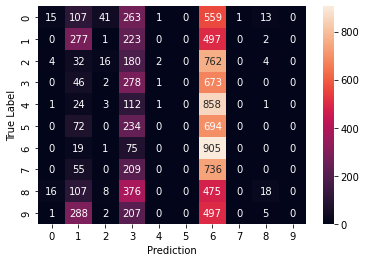

In [ ]:
# Load the pre-trained ResNet18 model
model_2 = torchvision.models.resnet18(pretrained=True)

# Freeze all layers in the feature extractor
for param in model_2.parameters():
    param.requires_grad = False

# Replace the last layer with a fully connected layer for 10 classes
model_2.fc = torch.nn.Sequential(
    torch.nn.Linear(512, 512),
    torch.nn.Tanh(),
    torch.nn.Linear(512, 10)
)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Set the optimizer to SGD with a learning rate of 0.01
optimizer = optim.Adam(model_2.parameters(), lr=0.1)


# Load the CIFAR-10 dataset and perform data augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the training set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Create a DataLoader for the training set
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=8)

# Load the test set
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create a DataLoader for the test set
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=8)


acc2 = []
epochs2 = 0


# Train the model
for epoch in range(20):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model_2(inputs)        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

    print('Epoch [{}/20], Loss: {:.4f}'.format(epoch + 1, running_loss / len(trainloader)))
   
    epochs2 = epoch + 1



print('Finished Training')

# Evaluate the model on the test set
with torch.no_grad():
    correct = 0
    total = 0
    all_predictions = []
    all_targets = []
    for data, target in testloader:
        output = model_2(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        all_predictions.extend(predicted.tolist())
        all_targets.extend(target.tolist())
    accuracy = 100 * correct / total
    print('Accuracy of the network on the test set: {:.2f}%'.format(accuracy))
    acc2.append(accuracy)
    # Calculate the confusion matrix
    cm2 = confusion_matrix(all_targets, all_predictions)
    f1_2 = f1_score(all_targets, all_predictions, average='weighted')
    print('F1 score: {:.2f}'.format(f1_2))

sns.heatmap(cm2, annot=True, fmt="d")
plt.xlabel("Prediction")
plt.ylabel("True Label")
plt.show()

#Different Hyperparameters: Model 3
Learning rate: 0.001, Batch size: 256, Optimizer: Adagrad, Epochs: 30, Activation function: Sigmoid

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Files already downloaded and verified
Files already downloaded and verified
Epoch [1/30], Loss: 2.0161
Epoch [2/30], Loss: 1.8603
Epoch [3/30], Loss: 1.8042
Epoch [4/30], Loss: 1.7785
Epoch [5/30], Loss: 1.7562
Epoch [6/30], Loss: 1.7393
Epoch [7/30], Loss: 1.7274
Epoch [8/30], Loss: 1.7178
Epoch [9/30], Loss: 1.7104
Epoch [10/30], Loss: 1.7057
Epoch [11/30], Loss: 1.6997
Epoch [12/30], Loss: 1.6949
Epoch [13/30], Loss: 1.6891
Epoch [14/30], Loss: 1.6869
Epoch [15/30], Loss: 1.6826
Epoch [16/30], Loss: 1.6822
Epoch [17/30], Loss: 1.6791
Epoch [18/30], Loss: 1.6781
Epoch [19/30], Loss: 1.6731
Epoch [20/30], Loss: 1.6768
Epoch [21/30], Loss: 1.6644
Epoch [22/30], Loss: 1.6718
Epoch [23/30], Loss: 1.6667
Epoch [24/30], Loss: 1.6688
Epoch [25/30], Loss: 1.6617
Epoch [26/30], Loss: 1.6596
Epoch [27/30], Loss: 1.6612
Epoch [28/30], Loss: 1.6536
Epoch [29/30], Loss: 1.6595
Epoch [30/30], Loss: 1.6544
Finished Training
Accuracy of the network on the test set: 41.82%
F1 score: 0.42


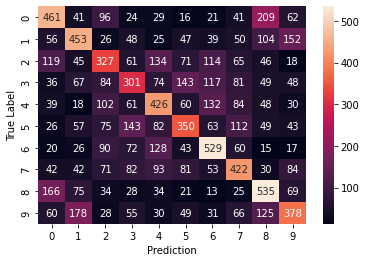

In [ ]:
# Load the pre-trained ResNet18 model
model_3 = torchvision.models.resnet18(pretrained=True)

# Freeze all layers in the feature extractor
for param in model_3.parameters():
    param.requires_grad = False

# Replace the last layer with a fully connected layer for 10 classes
model_3.fc = torch.nn.Sequential(
    torch.nn.Linear(512, 512),
    torch.nn.Sigmoid(),
    torch.nn.Linear(512, 10)
)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Set the optimizer to SGD with a learning rate of 0.01
optimizer = optim.Adagrad(model_3.parameters(), lr=0.001)


# Load the CIFAR-10 dataset and perform data augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the training set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Create a DataLoader for the training set
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True, num_workers=8)

# Load the test set
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create a DataLoader for the test set
testloader = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=False, num_workers=8)



acc3 = []
epochs3 = 0

# Train the model
for epoch in range(30):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model_3(inputs)        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

    print('Epoch [{}/30], Loss: {:.4f}'.format(epoch + 1, running_loss / len(trainloader)))
   
    epochs3 = epoch + 1


print('Finished Training')


# Evaluate the model on the test set
with torch.no_grad():
    correct = 0
    total = 0
    all_predictions = []
    all_targets = []
    for data, target in testloader:
        output = model_3(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        all_predictions.extend(predicted.tolist())
        all_targets.extend(target.tolist())
    accuracy = 100 * correct / total
    print('Accuracy of the network on the test set: {:.2f}%'.format(accuracy))
    acc3.append(accuracy)
    # Calculate the confusion matrix
    cm3 = confusion_matrix(all_targets, all_predictions)
    f1_3 = f1_score(all_targets, all_predictions, average='weighted')
    print('F1 score: {:.2f}'.format(f1_3))

sns.heatmap(cm3, annot=True, fmt="d")
plt.xlabel("Prediction")
plt.ylabel("True Label")
plt.show()

#Different Hyperparameters : Model 4 
Learning rate: 0.05, Batch size: 512, Optimizer: RProp, Epochs: 40, Activation function: Leaky ReLU


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Files already downloaded and verified
Files already downloaded and verified
Epoch [1/40], Loss: 676.0822
Epoch [2/40], Loss: 231.6378
Epoch [3/40], Loss: 167.6303
Epoch [4/40], Loss: 153.0886
Epoch [5/40], Loss: 146.4338
Epoch [6/40], Loss: 142.6712
Epoch [7/40], Loss: 141.8195
Epoch [8/40], Loss: 138.9229
Epoch [9/40], Loss: 137.6181
Epoch [10/40], Loss: 135.1386
Epoch [11/40], Loss: 135.1043
Epoch [12/40], Loss: 133.6022
Epoch [13/40], Loss: 133.1252
Epoch [14/40], Loss: 132.4849
Epoch [15/40], Loss: 131.0106
Epoch [16/40], Loss: 130.6996
Epoch [17/40], Loss: 131.5994
Epoch [18/40], Loss: 128.4458
Epoch [19/40], Loss: 129.5303
Epoch [20/40], Loss: 128.5519
Epoch [21/40], Loss: 127.5429
Epoch [22/40], Loss: 127.3398
Epoch [23/40], Loss: 126.7847
Epoch [24/40], Loss: 126.0913
Epoch [25/40], Loss: 125.7851
Epoch [26/40], Loss: 124.1096
Epoch [27/40], Loss: 123.9608
Epoch [28/40], Loss: 122.7442
Epoch [29/40], Loss: 123.3801
Epoch [30/40], Loss: 121.8100
Epoch [31/40], Loss: 121.1118
Epo

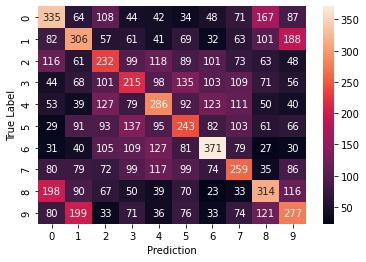

In [ ]:
# Load the pre-trained ResNet18 model
model_4 = torchvision.models.resnet18(pretrained=True)

# Freeze all layers in the feature extractor
for param in model_4.parameters():
    param.requires_grad = False

# Replace the last layer with a fully connected layer for 10 classes
model_4.fc = torch.nn.Sequential(
    torch.nn.Linear(512, 512),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(512, 10)
)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Set the optimizer to SGD with a learning rate of 0.05
optimizer = optim.Rprop(model_4.parameters(), lr=0.05)


# Load the CIFAR-10 dataset and perform data augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the training set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Create a DataLoader for the training set
trainloader = torch.utils.data.DataLoader(trainset, batch_size=512, shuffle=True, num_workers=8)

# Load the test set
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create a DataLoader for the test set
testloader = torch.utils.data.DataLoader(testset, batch_size=512, shuffle=False, num_workers=8)


acc4 = []
epochs4 = 0


# Train the model
for epoch in range(40):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model_4(inputs)        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

    print('Epoch [{}/40], Loss: {:.4f}'.format(epoch + 1, running_loss / len(trainloader)))
    epochs4 = epoch + 1



print('Finished Training')


# Evaluate the model on the test set
with torch.no_grad():
    correct = 0
    total = 0
    all_predictions = []
    all_targets = []
    for data, target in testloader:
        output = model_4(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        all_predictions.extend(predicted.tolist())
        all_targets.extend(target.tolist())
    accuracy = 100 * correct / total
    print('Accuracy of the network on the test set: {:.2f}%'.format(accuracy))
    acc4.append(accuracy)
    # Calculate the confusion matrix
    cm4 = confusion_matrix(all_targets, all_predictions)

    f1_4 = f1_score(all_targets, all_predictions, average='weighted')
    print('F1 score: {:.2f}'.format(f1_4))


sns.heatmap(cm4, annot=True, fmt="d")
plt.xlabel("Prediction")
plt.ylabel("True Label")
plt.show()


#Different Hyperparameteers: Model 5
Learning rate: 0.005, Batch size: 128, Optimizer: Adamax, Epochs: 50, Activation function: ELU

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Files already downloaded and verified
Files already downloaded and verified
Epoch [1/50], Loss: 1.7948
Epoch [2/50], Loss: 1.6777
Epoch [3/50], Loss: 1.6478
Epoch [4/50], Loss: 1.6292
Epoch [5/50], Loss: 1.6184
Epoch [6/50], Loss: 1.5991
Epoch [7/50], Loss: 1.5888
Epoch [8/50], Loss: 1.5852
Epoch [9/50], Loss: 1.5817
Epoch [10/50], Loss: 1.5670
Epoch [11/50], Loss: 1.5537
Epoch [12/50], Loss: 1.5549
Epoch [13/50], Loss: 1.5483
Epoch [14/50], Loss: 1.5487
Epoch [15/50], Loss: 1.5435
Epoch [16/50], Loss: 1.5385
Epoch [17/50], Loss: 1.5332
Epoch [18/50], Loss: 1.5374
Epoch [19/50], Loss: 1.5277
Epoch [20/50], Loss: 1.5289
Epoch [21/50], Loss: 1.5205
Epoch [22/50], Loss: 1.5221
Epoch [23/50], Loss: 1.5180
Epoch [24/50], Loss: 1.5157
Epoch [25/50], Loss: 1.5021
Epoch [26/50], Loss: 1.5066
Epoch [27/50], Loss: 1.5161
Epoch [28/50], Loss: 1.5030
Epoch [29/50], Loss: 1.5072
Epoch [30/50], Loss: 1.5023
Epoch [31/50], Loss: 1.4977
Epoch [32/50], Loss: 1.5065
Epoch [33/50], Loss: 1.4881
Epoch [34

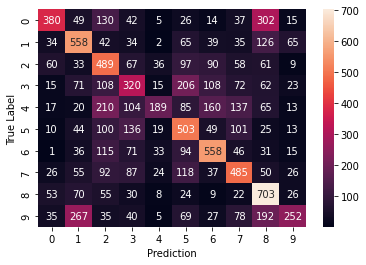

In [ ]:
# Load the pre-trained ResNet18 model
model_5 = torchvision.models.resnet18(pretrained=True)

# Freeze all layers in the feature extractor
for param in model_5.parameters():
    param.requires_grad = False

# Replace the last layer with a fully connected layer for 10 classes
model_5.fc = torch.nn.Sequential(
    torch.nn.Linear(512, 512),
    torch.nn.ELU(),
    torch.nn.Linear(512, 10)
)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Set the optimizer to SGD with a learning rate of 0.005
optimizer = optim.Adamax(model_5.parameters(), lr=0.005)


# Load the CIFAR-10 dataset and perform data augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the training set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Create a DataLoader for the training set
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=8)

# Load the test set
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create a DataLoader for the test set
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=8)



acc5 = []
epochs5 = 0

# Train the model
for epoch in range(50):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model_5(inputs)        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

    print('Epoch [{}/50], Loss: {:.4f}'.format(epoch + 1, running_loss / len(trainloader)))
    epochs5 = epoch + 1


print('Finished Training')


# Evaluate the model on the test set
with torch.no_grad():
    correct = 0
    total = 0
    all_predictions = []
    all_targets = []
    for data, target in testloader:
        output = model_5(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        all_predictions.extend(predicted.tolist())
        all_targets.extend(target.tolist())
    accuracy = 100 * correct / total
    print('Accuracy of the network on the test set: {:.2f}%'.format(accuracy))
    acc5.append(accuracy)
    # Calculate the confusion matrix
    cm5 = confusion_matrix(all_targets, all_predictions)
    f1_5 = f1_score(all_targets, all_predictions, average='weighted')
    print('F1 score: {:.2f}'.format(f1_5))

sns.heatmap(cm5, annot=True, fmt="d")
plt.xlabel("Prediction")
plt.ylabel("True Label")
plt.show()


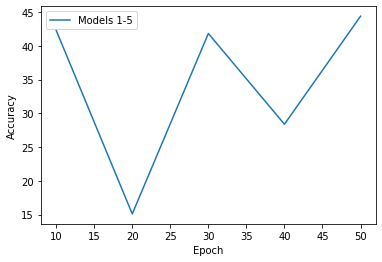

In [ ]:
# Plot the accuracy
epochs = [10, 20, 30, 40, 50]
# acc1=42.48
# acc2=20.05
# acc3=41.3
# acc4=27.90
# acc5=45.73
plt.plot(epochs, [acc1, acc2, acc3, acc4, acc5], label='Models 1-5')

# Add labels and legend
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


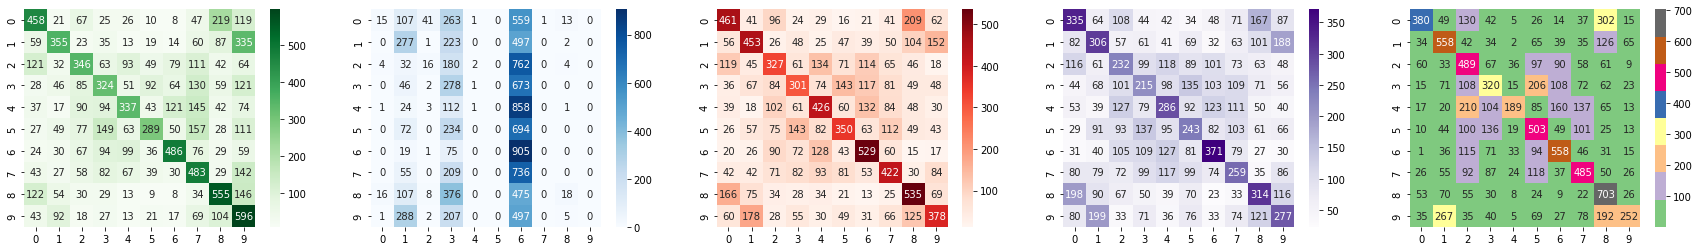

In [ ]:
# Create a figure with 5 subplots
fig, ax = plt.subplots(1, 5,figsize=(30, 4) )

# Plot the first confusion matrix in the first subplot
sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens', ax=ax[0])

# Plot the second confusion matrix in the second subplot
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=ax[1])

# Plot the third confusion matrix in the third subplot
sns.heatmap(cm3, annot=True, fmt='d', cmap='Reds', ax=ax[2])

# Plot the fourth confusion matrix in the fourth subplot
sns.heatmap(cm4, annot=True, fmt='d', cmap='Purples', ax=ax[3])

# Plot the fifth confusion matrix in the fifth subplot
sns.heatmap(cm5, annot=True, fmt='d', cmap='Accent', ax=ax[4])

# Display the figure
plt.show()


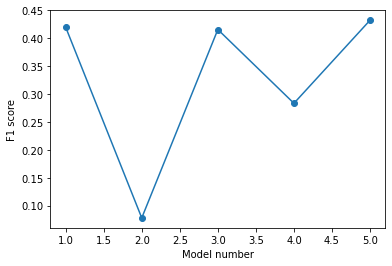

In [ ]:
# Plot the F1 score of each model
# f1_1 =0.42
# f1_2 =0.11 
# f1_3 =0.41
# f1_4 =0.29 
#f1_5 =0.45 
plt.plot([1, 2, 3, 4, 5], [f1_1, f1_2, f1_3, f1_4, f1_5], marker='o')

# Add labels and legend
plt.xlabel('Model number')
plt.ylabel('F1 score')

# Show the plot
plt.show()

Model 1: The image is predicted to be a truck with 17.69% confidence
Model 2: The image is predicted to be a frog with 92.34% confidence
Model 3: The image is predicted to be a cat with 13.07% confidence
Model 4: The image is predicted to be a bird with 100.00% confidence
Model 5: The image is predicted to be a horse with 16.99% confidence


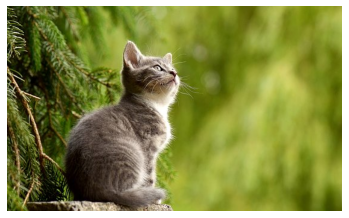

In [ ]:
# Load the image
image = plt.imread("cat.jpg")

# Convert the numpy array to a PIL image
image = Image.fromarray(np.uint8(image))

# Preprocess the image
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
image = transform(image).unsqueeze(0)

# Make a prediction using the first model
output = model_1(image)
probabilities = F.softmax(output, dim=1)
probability, predicted = torch.max(probabilities, 1)

# Convert the class number to a class label
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_label = class_labels[predicted.item()]

# Print the result
print("Model 1: The image is predicted to be a {} with {:.2f}% confidence".format(predicted_label, probability.item() * 100))

# Make a prediction using the second model
output = model_2(image)
probabilities = F.softmax(output, dim=1)
probability, predicted = torch.max(probabilities, 1)

# Convert the class number to a class label
predicted_label = class_labels[predicted.item()]

# Print the result
print("Model 2: The image is predicted to be a {} with {:.2f}% confidence".format(predicted_label, probability.item() * 100))


# Make a prediction using the third model
output = model_3(image)
probabilities = F.softmax(output, dim=1)
probability, predicted = torch.max(probabilities, 1)

# Convert the class number to a class label
predicted_label = class_labels[predicted.item()]

# Print the result
print("Model 3: The image is predicted to be a {} with {:.2f}% confidence".format(predicted_label, probability.item() * 100))



# Make a prediction using the fourth model
output = model_4(image)
probabilities = F.softmax(output, dim=1)
probability, predicted = torch.max(probabilities, 1)

# Convert the class number to a class label
predicted_label = class_labels[predicted.item()]

# Print the result
print("Model 4: The image is predicted to be a {} with {:.2f}% confidence".format(predicted_label, probability.item() * 100))


# Make a prediction using the Fifth model
output = model_5(image)
probabilities = F.softmax(output, dim=1)
probability, predicted = torch.max(probabilities, 1)

# Convert the class number to a class label
predicted_label = class_labels[predicted.item()]



# Print the result
print("Model 5: The image is predicted to be a {} with {:.2f}% confidence".format(predicted_label, probability.item() * 100))


# Plot the original image
plt.imshow(np.array(Image.open("cat.jpg"))/255)
plt.axis("off")
plt.show()
